In [430]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


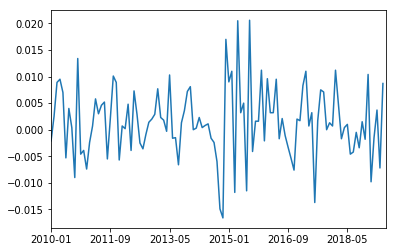

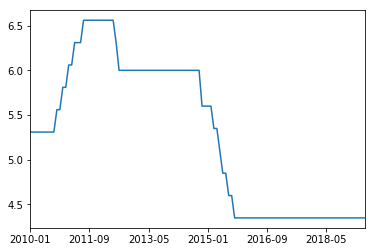

In [595]:
def huan1(z):
    '''
    a is the window.
    b is the center of function.
    z is the height or altitude in this case.(numpy array or one value)
    '''

    logical_positive = np.logical_and(z!=np.nan, z>0)
    logical_negative = np.logical_and(z!=np.nan,z<0)
    tmpvalue = np.where(logical_positive, 1.1, np.where(logical_negative,0.9, 
                                                          1))
    return tmpvalue

def huan(z):
    '''
    a is the window.
    b is the center of function.
    z is the height or altitude in this case.(numpy array or one value)
    '''
    logical_positive = np.logical_and(z!=np.nan, z>0)

    tmpvalue = np.where(logical_positive, 1, -1)
    return tmpvalue
# 载入数据Loading data
df1 = pd.read_csv("berra.csv")
df2 = pd.read_csv("ZX3.csv")
df3 = pd.read_csv("hg.csv")
df3["date"]=df3["date"].astype('datetime64')

df1["date"]=pd.to_datetime(df1["date"])
df2["date"]=pd.to_datetime(df2["date"])
df1.set_index("date",inplace=True)
df2.set_index("date", inplace=True)
df2=df2.convert_objects(convert_numeric=True)

# print(df2.dtypes)


# 按时间合并两个表 2010-01-04---2019-06-03
index = pd.merge(df1, df2, on='date')
d=[]

for i in index.index:
    i=i.strftime("%Y-%m")
    d.append(i)
index.index=d

# print(index)
#转成收益率
index=(index.shift(-1)/index)-1
# index=index.rolling(4,min_periods=2,axis=0).mean()
# print(index)
index['growth'].plot()
plt.show()
# for col in index:
#     index[col]=huan1(index[col])
# print(index)

hg=df3.copy()
hg.set_index("date", inplace=True)
hg=hg['2010-01':'2019-06']
hgd=pd.DataFrame(hg).drop(columns='dfxm')

k=[]
for i in hgd.index:
    i=i.strftime("%Y-%m")
    k.append(i)
hgd.index=k
hgd['dq'].plot()
plt.show()
# print(hgd)


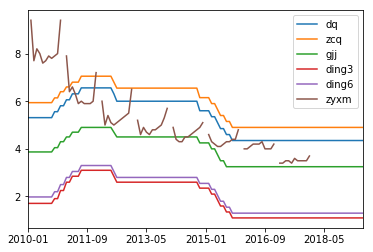

In [594]:
# print(index.dtypes)

hgd.cumsum()
hgd.plot()
plt.show()

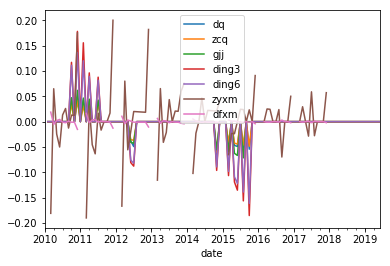

In [565]:
# print(hg_ratio)
hg_ratio=hg.copy()
hg_ratio['dq'] = (hg_ratio['dq'] - hg_ratio['dq'].shift(1)) / hg_ratio['dq'].shift(1)
hg_ratio['zcq'] = (hg_ratio['zcq'] - hg_ratio['zcq'].shift(1)) / hg_ratio['zcq'].shift(1)
hg_ratio['gjj'] = (hg_ratio['gjj'] - hg_ratio['gjj'].shift(1)) / hg_ratio['gjj'].shift(1)
hg_ratio['ding3'] = (hg_ratio['ding3'] - hg_ratio['ding3'].shift(1)) / hg_ratio['ding3'].shift(1)
hg_ratio['ding6'] = (hg_ratio['ding6'] - hg_ratio['ding6'].shift(1)) / hg_ratio['ding6'].shift(1)
hg_ratio['zyxm'] = (hg_ratio['zyxm'] - hg_ratio['zyxm'].shift(1)) / hg_ratio['zyxm'].shift(1)
hg_ratio['dfxm'] = (hg_ratio['dfxm'] - hg_ratio['dfxm'].shift(1)) / hg_ratio['dfxm'].shift(1)
hg_ratio.cumsum()
hg_ratio.plot()
plt.show()

In [566]:

hg_rmean=hg_ratio.rolling(2,min_periods=2,axis=0).mean()
# hg_rmean=hg_rmean['2010-01-04':'2019-06-03']
# hg_ratio=hg_rmean.copy()


# # print(hg_ratio)
# hg_ratio['dqR'] = (hg_ratio['dq'] - hg_ratio['dq'].shift(1)) / hg_ratio['dq'].shift(1)
# hg_ratio['zcqR'] = (hg_ratio['zcq'] - hg_ratio['zcq'].shift(1)) / hg_ratio['zcq'].shift(1)
# hg_ratio['gjjR'] = (hg_ratio['gjj'] - hg_ratio['gjj'].shift(1)) / hg_ratio['gjj'].shift(1)
# hg_ratio['ding3R'] = (hg_ratio['ding3'] - hg_ratio['ding3'].shift(1)) / hg_ratio['ding3'].shift(1)
# hg_ratio['ding6R'] = (hg_ratio['ding6'] - hg_ratio['ding6'].shift(1)) / hg_ratio['ding6'].shift(1)
# hg_ratio['zyxmR'] = (hg_ratio['zyxm'] - hg_ratio['zyxm'].shift(1)) / hg_ratio['zyxm'].shift(1)
# hg_ratio['dfxmR'] = (hg_ratio['dfxm'] - hg_ratio['dfxm'].shift(1)) / hg_ratio['dfxm'].shift(1)
# 
# 
# for col in hg_ratio:
#     hg_ratio[col]=huan(hg_ratio[col])
#     
#     


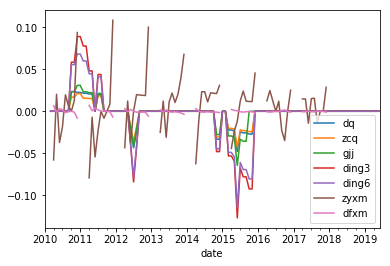

In [567]:
hg_rmean.cumsum()
hg_rmean.plot()
plt.show()

In [568]:
for col in hg_rmean:
    hg_rmean[col]=huan1(hg_rmean[col])
# hg_rmean.cumsum()
# hg_rmean.plot()

# hg_rmean['dq'].plot()
# hg_rmean['roll']=hg_rmean['ding6'].copy()
# hg_rmean['roll']=huan1(hg_rmean['roll'])
# hg_rmean['roll'].plot()
# hg_rmean['yuan']=hgd['ding3'].copy()
# hg_rmean['yuan'].plot()
# plt.grid(which='minor')
# plt.show()

In [569]:
# print(rp.summary_cont(index['beta']))
# print(rp.summary_cont(index['size']))
# print(rp.summary_cont(index['leverage']))
# print(rp.summary_cont(index['book_to_price']))
# print(rp.summary_cont(index['earning_yield']))
# print(rp.summary_cont(index['growth']))
# print(rp.summary_cont(index['liquidity']))
# print(rp.summary_cont(index['nl_size']))
# print(rp.summary_cont(index['momentum']))
# print(rp.summary_cont(index['volatility']))
# print(rp.summary_cont(index['HuoD']))
# print(rp.summary_cont(index['FaD']))
# # print(rp.summary_cont(index['XiD']))
# index['growth'].plot()
# plt.show()

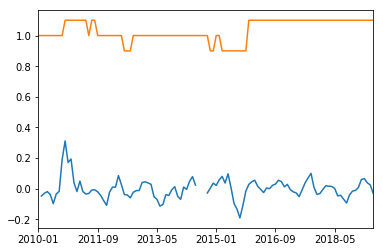

In [570]:
mm = pd.concat([index,hg_rmean],axis=1)
mm['XiD'].plot()
mm['zcq'].plot()
plt.show()
# print(mm)
# print(index)
# hg_ratio = np.where(hg_ratio[""] < 0, "N", "P")
# print(hg_ratio)

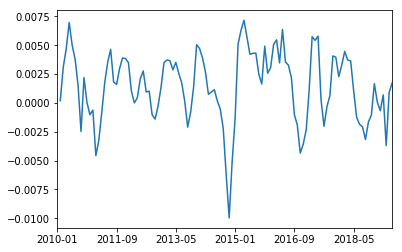

In [571]:
mm['roll']=mm['ding3'].copy()
mm['roll']=huan1(mm['roll'])
# mm['roll'].plot()
mm['yuan']=hgd['ding3'].copy()
# mm['yuan'].plot()
mm['growth'].plot()
plt.grid(which='minor')
plt.show()

In [572]:
# index.cumsum()
# index.plot()
# plt.show()
# 
# hg_ratio.cumsum()
# hg_ratio.plot()
# plt.show()

In [573]:
#
# 
# hg_cat["dq"]=huan(hg_ratio["dq"])
# hg_cat["zcq"]=huan(hg_ratio["zcq"])
# hg_cat["gjj"]=huan(hg_ratio["gjj"])
# hg_cat["ding3"]=huan(hg_ratio["ding3"])
# hg_cat["ding6"]=huan(hg_ratio["ding6"])
# hg_cat["zyxm"]=huan(hg_ratio["zyxm"])
# hg_cat["dfxm"]=huan(hg_ratio["dfxm"])

# d=[]
# 
# for i in mm.index:
#     i=i.strftime("%Y-%m")
#     d.append(i)
# mm.index=d

  

In [574]:



# d_rows=pd.DataFrame.duplicated(mm,keep=False)
# d_rows=mm[mm.index.duplicated(keep=False)]
# print(d_rows)
# print(mm)
# mm['growth'].plot()
# plt.show()

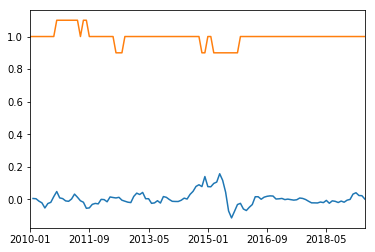

In [586]:
# mm=mm.groupby(mm.index).sum().dropna()
# print(mm)
# print(rp.summary_cont(mm['growth'].groupby(mm['dq'])))
mm['FaD'].plot()
mm['ding6'].plot()
plt.show()

In [576]:
results = ols('FaD ~ C(ding6)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
C(ding6)  0.013805    2.0  4.379754  0.014786
Residual  0.173365  110.0       NaN       NaN


In [591]:
results = ols('XiD ~ C(ding3)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
C(ding3)  0.059077    2.0  7.426302  0.000955
Residual  0.425600  107.0       NaN       NaN


In [578]:
results = ols('growth ~ C(dq)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

           sum_sq     df         F    PR(>F)
C(dq)     0.00001    2.0  0.520747  0.595534
Residual  0.00103  110.0       NaN       NaN


In [579]:
results = ols('growth ~ C(gjj)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
C(gjj)    0.000023    2.0  1.238818  0.293736
Residual  0.001016  110.0       NaN       NaN


In [592]:
results = ols('XiD ~ C(ding3)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
C(ding3)  0.059077    2.0  7.426302  0.000955
Residual  0.425600  107.0       NaN       NaN


In [581]:
results = ols('growth ~ C(dfxm)', data=mm).fit()
# print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
C(dfxm)   0.000024    2.0  1.282027  0.281587
Residual  0.001016  110.0       NaN       NaN


In [582]:
results = ols('growth ~ C(dfxm)', data=mm).fit()
print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.282
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.282
Time:                        15:28:03   Log-Likelihood:                 496.17
No. Observations:                 113   AIC:                            -986.3
Df Residuals:                     110   BIC:                            -978.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0010      0.000      2.

In [583]:
results = ols('XiD ~ C(dfxm)', data=mm).fit()
print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)


                            OLS Regression Results                            
Dep. Variable:                    XiD   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.250
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.291
Time:                        15:28:08   Log-Likelihood:                 143.55
No. Observations:                 110   AIC:                            -281.1
Df Residuals:                     107   BIC:                            -273.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0124      0.011     -1.

In [584]:
# # datet=mm.index.copy()
# # 
# import datetime as dt
# # datetime2 = [(x.shiftime('%Y-%m')) for x in datet]
# mm.index.strftime('%Y-%m')
# # mm["date"]= datetime2
# #  
# 
# mm.groupby(mm.index).ffill().groupby(mm.index).last()
# mm.index = mm.index.droplevel(0)
# print(mm)

In [587]:
results = ols('FaD ~ C(ding6)', data=mm).fit()
print(results.summary())

aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:                    FaD   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.380
Date:                Tue, 17 Sep 2019   Prob (F-statistic):             0.0148
Time:                        15:30:28   Log-Likelihood:                 205.77
No. Observations:                 113   AIC:                            -405.5
Df Residuals:                     110   BIC:                            -397.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0334      0.011     